In [10]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from time import time
import os
import json
from yelp_multiclass.data.yelp_dataset import load_data
from keras.preprocessing import sequence
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.callbacks import TensorBoard
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from yelp_multiclass.data.yelp_dataset import load_data
from yelp_multiclass.data.config import getModelFile,getDataFile,getJsonFile
from yelp_multiclass.data.textProcess import tokenizeText,buildIndexToWordDict,createTextSent,createNumericSent

In [42]:
azure_model_path="G:/work/nlp/datasets/yelp/yelp_dataset_challenge_round9/keras/dataset/yelp_model_mullticlass.h5"

In [43]:
azure_model=load_model(azure_model_path)

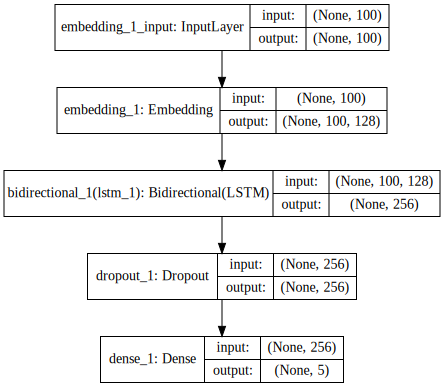

In [44]:
os.environ["PATH"] += os.pathsep + 'C:\\Python\\graphviz-2.38\\release\\bin\\'
SVG(model_to_dot(azure_model,show_shapes=True).create(prog='dot', format='svg'))

In [45]:
negative_review=" Its a roadside restaurant (pathetic)...its no way a cafe! If u end up visiting...you'll be served disgust! Its a part of some theatre and there's some alien name on the board"
positive_review="The food was absolutely wonderful, from preparation to presentation, very pleasing.. especially the veg cheese salad and falafal. Truly a home like taste away from home!!. thumbs up. "

In [46]:
with open(getJsonFile(), 'r', encoding="utf-8") as fp:
    word_idx = json.load(fp)


In [47]:
x1=createNumericSent(negative_review,word_idx)
x2=createNumericSent(positive_review,word_idx)

In [48]:
print(x1)
print(x2)

[18, 213, 4, 19644, 84, 198298, 213, 62, 127, 4, 761, 38, 1220, 416, 57, 1012, 724, 32, 260, 9946, 213, 4, 409, 7, 64, 6490, 2, 423, 64, 16458, 508, 21, 1, 1840]
[1, 25, 6, 458, 3999, 53, 3578, 5, 5707, 39, 5261, 403, 1, 3149, 149, 165, 2, 33604, 1017, 4, 275, 36, 176, 254, 53, 275, 2805, 57, 18]


In [49]:
x=[x1,x2]

In [50]:
x = sequence.pad_sequences(x, maxlen=100)

In [51]:
print(x.shape)

(2, 100)


In [52]:
print(x)

[[     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0     18    213      4  19644
      84 198298    213     62    127      4    761     38   1220    416
      57   1012    724     32    260   9946    213      4    409      7
      64   6490      2    423     64  16458    508     21      1   1840]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      

In [53]:
res=azure_model.predict(x)

In [54]:
print(res)

[[0.19251436 0.18285888 0.18462743 0.2081111  0.23188816]
 [0.19510584 0.18362617 0.18521215 0.20633861 0.22971721]]


In [56]:
print(np.argmax(res[0]))

4


In [57]:
print(np.argmax(res[1]))

4
